In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("kdtrain.csv",sep=',')
print(df.head())

    id   age     bp     sg   al   su     rbc        pc         pcc  \
0  157  62.0   70.0  1.025  3.0  0.0  normal  abnormal  notpresent   
1  109  54.0   70.0    NaN  NaN  NaN     NaN       NaN  notpresent   
2   17  47.0   80.0    NaN  NaN  NaN     NaN       NaN  notpresent   
3  347  43.0   60.0  1.025  0.0  0.0  normal    normal  notpresent   
4   24  42.0  100.0  1.015  4.0  0.0  normal  abnormal  notpresent   

           ba  ...   pcv    wc   rc  htn   dm  cad  appet  pe ane  \
0  notpresent  ...  39.0  7900  3.9  yes  yes   no   good  no  no   
1  notpresent  ...   NaN   NaN  NaN   no  yes   no   good  no  no   
2  notpresent  ...   NaN   NaN  NaN  yes   no   no   poor  no  no   
3  notpresent  ...  43.0  7200  5.5   no   no   no   good  no  no   
4     present  ...  39.0  8300  4.6  yes   no   no   poor  no  no   

  classification  
0            ckd  
1            ckd  
2            ckd  
3         notckd  
4            ckd  

[5 rows x 26 columns]


In [2]:
print(df.describe()) 

               id         age          bp          sg          al          su  \
count  280.000000  275.000000  271.000000  244.000000  245.000000  242.000000   
mean   202.928571   51.454545   76.051661    1.017439    1.024490    0.438017   
std    111.988168   17.476176   14.256289    0.005746    1.375805    1.073193   
min      1.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%    110.500000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    202.000000   55.000000   70.000000    1.020000    0.000000    0.000000   
75%    302.250000   65.000000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  \
count  247.000000  266.000000  268.000000  213.000000  212.000000  241.000000   
mean   150.186235   56.983835    3.006157  137.255869    4.754245   12.531535   
std     77.357144   51.4566

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
id                280 non-null int64
age               275 non-null float64
bp                271 non-null float64
sg                244 non-null float64
al                245 non-null float64
su                242 non-null float64
rbc               173 non-null object
pc                230 non-null object
pcc               276 non-null object
ba                276 non-null object
bgr               247 non-null float64
bu                266 non-null float64
sc                268 non-null float64
sod               213 non-null float64
pot               212 non-null float64
hemo              241 non-null float64
pcv               229 non-null float64
wc                203 non-null object
rc                187 non-null object
htn               279 non-null object
dm                279 non-null object
cad               279 non-null object
appet             280 non-null object
pe        

In [4]:
df=df.loc[:,["bgr","bu","sc","sod","pot","hemo","pcv","classification"]]
print(df.head())

     bgr    bu   sc    sod  pot  hemo   pcv classification
0  122.0  42.0  1.7  136.0  4.7  12.6  39.0            ckd
1  233.0  50.1  1.9    NaN  NaN  11.7   NaN            ckd
2  114.0  87.0  5.2  139.0  3.7  12.1   NaN            ckd
3  108.0  25.0  1.0  144.0  5.0  17.8  43.0         notckd
4    NaN  50.0  1.4  129.0  4.0  11.1  39.0            ckd


In [5]:
print(df.isnull().sum())

bgr               33
bu                14
sc                12
sod               67
pot               68
hemo              39
pcv               51
classification     0
dtype: int64


In [6]:
#replacing
df["bgr"]=df["bgr"].interpolate()
df["bu"]=df["bu"].interpolate()
df["sc"]=df["sc"].interpolate()
df["sod"]=df["sod"].interpolate()
df["pot"]=df["pot"].interpolate()
df["hemo"]=df["hemo"].interpolate()
df["pcv"]=df["pcv"].interpolate()

In [7]:
print(df.isnull().sum())

bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
classification    0
dtype: int64


In [8]:
df.dtypes

bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
classification     object
dtype: object

In [9]:
donusum = {"bgr": int, 
           "bu": int,
           "sod":int,
           "pcv":int} 
df=df.astype(donusum)
print(df.dtypes)

bgr                 int32
bu                  int32
sc                float64
sod                 int32
pot               float64
hemo              float64
pcv                 int32
classification     object
dtype: object


In [10]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [bgr, bu, sc, sod, pot, hemo, pcv, classification]
Index: []


In [11]:
print(df["bgr"].mean())
print(df["bgr"].std())
print(np.median(df["bgr"]))

150.475
74.41518288927637
124.5


In [12]:
print(df["bu"].mean())
print(df["bu"].std())
print(np.median(df["bu"]))

57.767857142857146
51.85981623757039
41.5


In [13]:
print(df["sc"].mean())
print(df["sc"].std())
print(np.median(df["sc"]))

3.065535714285717
5.821054640813501
1.35


In [14]:
print(df["sod"].mean())
print(df["sod"].std())
print(np.median(df["sod"]))

137.18214285714285
10.741623512227722
137.5


In [15]:
print(df["pot"].mean())
print(df["pot"].std())
print(np.median(df["pot"]))

4.965357142857145
4.08347488007521
4.477500000000001


In [16]:
print(df["hemo"].mean())
print(df["hemo"].std())
print(np.median(df["hemo"]))

12.531428571428574
2.7775044924451002
12.75


In [17]:
print(df["pcv"].mean())
print(df["pcv"].std())
print(np.median(df["pcv"]))

39.135714285714286
8.345763387075912
40.0


In [18]:
notckd=df[df.classification=="notckd"]
ckd=df[df.classification=="ckd"]

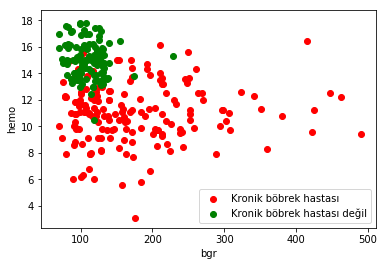

In [20]:
import matplotlib.pyplot as plt
plt.scatter(ckd.bgr,ckd.hemo,color="red",label="Kronik böbrek hastası")
plt.scatter(notckd.bgr,notckd.hemo,color="green",label="Kronik böbrek hastası değil")
plt.xlabel("bgr")
plt.ylabel("hemo")
plt.legend()
plt.show()

In [21]:
df.classification=[1 if i =="ckd" else 0 for i in df.classification]
print(df.head())

   bgr  bu   sc  sod  pot  hemo  pcv  classification
0  122  42  1.7  136  4.7  12.6   39               1
1  233  50  1.9  137  4.2  11.7   40               1
2  114  87  5.2  139  3.7  12.1   41               1
3  108  25  1.0  144  5.0  17.8   43               0
4  184  50  1.4  129  4.0  11.1   39               1


In [22]:
x_data=df.drop(["classification"],axis=1)

In [23]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [24]:
print(x)

          bgr        bu        sc       sod       pot      hemo       pcv
0    0.123810  0.083990  0.017196  0.830189  0.045147  0.646259  0.666667
1    0.388095  0.104987  0.019841  0.836478  0.033860  0.585034  0.688889
2    0.104762  0.202100  0.063492  0.849057  0.022573  0.612245  0.711111
3    0.090476  0.039370  0.007937  0.880503  0.051919  1.000000  0.755556
4    0.271429  0.104987  0.013228  0.786164  0.029345  0.544218  0.666667
5    0.454762  0.125984  0.023810  0.685535  0.006772  0.761905  0.666667
6    0.030952  0.102362  0.006614  0.849057  0.013544  0.979592  0.688889
7    0.097619  0.060367  0.007937  0.918239  0.051919  0.829932  0.777778
8    0.164286  0.023622  0.006614  0.867925  0.066591  0.653061  0.733333
9    0.078571  0.181102  0.064815  0.823899  0.081264  0.217687  0.222222
10   0.147619  0.020997  0.009259  0.899371  0.045147  0.721088  0.800000
11   0.107143  0.818898  0.166667  0.767296  0.047404  0.333333  0.333333
12   0.066667  0.026247  0.001323  0.8

In [25]:
y=df.classification.values

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=1)

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

knn_pred=knn.predict(x_test)

print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
knn_score=knn.score(x_test,y_test)
print(knn_score)

[[20  1]
 [ 2 33]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        35

   micro avg       0.95      0.95      0.95        56
   macro avg       0.94      0.95      0.94        56
weighted avg       0.95      0.95      0.95        56

0.9464285714285714


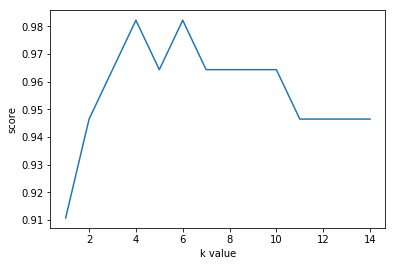

In [27]:
score_list=[]
for i in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k value")
plt.ylabel("score")
plt.show()

In [28]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

knn_pred=knn.predict(x_test)

print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
knn_score=knn.score(x_test,y_test)
print(knn_score)

[[21  0]
 [ 1 34]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.99        35

   micro avg       0.98      0.98      0.98        56
   macro avg       0.98      0.99      0.98        56
weighted avg       0.98      0.98      0.98        56

0.9821428571428571


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("svm score:",svm.score(x_test,y_test))

[[20  1]
 [ 2 33]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        35

   micro avg       0.95      0.95      0.95        56
   macro avg       0.94      0.95      0.94        56
weighted avg       0.95      0.95      0.95        56

svm score: 0.9464285714285714


In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("dt score:",dt.score(x_test,y_test))

[[19  2]
 [ 5 30]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.94      0.86      0.90        35

   micro avg       0.88      0.88      0.88        56
   macro avg       0.86      0.88      0.87        56
weighted avg       0.88      0.88      0.88        56

dt score: 0.875


In [31]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.10,random_state=1)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("dt score:",dt.score(x_test,y_test))

[[11  0]
 [ 1 16]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.94      0.97        17

   micro avg       0.96      0.96      0.96        28
   macro avg       0.96      0.97      0.96        28
weighted avg       0.97      0.96      0.96        28

dt score: 0.9642857142857143


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=1)
rf=RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("dt score:",rf.score(x_test,y_test))

[[20  1]
 [ 1 34]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        35

   micro avg       0.96      0.96      0.96        56
   macro avg       0.96      0.96      0.96        56
weighted avg       0.96      0.96      0.96        56

dt score: 0.9642857142857143
